In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Folder with all CSV-files
folder_path = "/content/drive/MyDrive/Total_net"

# Find all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and unite CSV files
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save into 1 CSV-file
combined_df.to_csv('connected_file.csv', index=False)

# download file
df1 = pd.read_csv('connected_file.csv')

df1 = df1.iloc[1:]

# Working with first column (divide it into 2 columns with Date and Time)
df1['Date (GMT+1)'] = pd.to_datetime(df1['Date (GMT+1)'], utc=True)

df1['Date'] = df1['Date (GMT+1)'].dt.date       # Only date
df1['Time'] = df1['Date (GMT+1)'].dt.time       # Only Time

df1.drop(columns=['Date (GMT+1)'], inplace=True)
df1.drop(columns=['Solar'], inplace=True)



# Save
df1.to_csv('with_separated_time_and_date.csv', index=False)


print(len(df1))
df1.head()

Mounted at /content/drive


/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,

187299


,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil coal-derived gas,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Wind offshore,Wind onshore,Load (incl. self-consumption),Nuclear,Date,Time
1,1526.9,4501.3,3336.8,2691.3,513.3,159.3,5017.1,23.8,108.6,453.1,1479.8,961.3,2415.1,32462.5,50971.8,NaN,2024-12-31,23:00:00
2,1540.1,4355.5,3350.9,2447.3,513.4,135.3,5000.2,23.8,160.7,838.4,1480.2,961,2601.3,32322.9,50048,NaN,2024-12-31,23:15:00
3,1539.7,4288.4,3347.5,2423.2,513.3,135.1,4952.9,23.8,75.1,435.4,1480.3,961.1,2542.3,32321.4,50088.8,NaN,2024-12-31,23:30:00
4,1567.1,4257.1,3379.6,2411.4,513.3,138,5019.7,23.9,58,105.9,1480,962.5,2450,32383.3,49955.6,NaN,2024-12-31,23:45:00
5,1542.2,4329.6,3930.2,2404.7,513.3,136,4799.9,24,58.5,367,1479.5,966.4,2252.6,32740,49695.9,NaN,2025-01-01,00:00:00


In [ ]:
# Folder with all CSV-files
folder_path2 = "/content/drive/MyDrive/Forecast"

# Find all CSV files
csv_files2 = glob.glob(os.path.join(folder_path2, '*.csv'))

# Read and unite CSV files
df_list2 = [pd.read_csv(file) for file in csv_files2]
combined_df2 = pd.concat(df_list2, ignore_index=True)

# Save into 1 CSV-file
combined_df2.to_csv('connected_file2.csv', index=False)

# download file
df2 = pd.read_csv('connected_file2.csv')

df2 = df2.iloc[1:187300]

# Working with first column (we don't need it here)
df2.drop(columns=['Date (GMT+1)'], inplace=True)

# Save
df2.to_csv('with_separated_time_and_date2.csv', index=False)


print(len(df2))
df2.head()

/tmp/ipython-input-3-1946576450.py:15: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('connected_file2.csv')


187299


,Solar,"Solar forecast (Day-Ahead, D-1 18:00)","Solar forecast (Intraday, 8:00)",Solar forecast (Current)
1,9.9,0,0,0
2,9.3,0,0,0
3,9.3,0,0,0
4,9.5,0,0,0
5,9.9,0,0,0


In [ ]:
final_df = pd.concat([df1, df2], axis=1)
final_df.to_csv('connected_by_columns.csv', index=False)
final_df.head()

# Delete two columns where we don't have enough information
final_df.drop(columns=['Solar forecast (Current)', 'Fossil coal-derived gas', 'Solar forecast (Intraday, 8:00)'], inplace=True)
final_df.head()
final_df = final_df[~final_df.isin(['Power (MW)']).any(axis=1)]

# Germany doesn't have Nuclear energy
final_df.drop(columns=['Nuclear'], inplace=True)

/tmp/ipython-input-4-524241330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop(columns=['Nuclear'], inplace=True)


In [ ]:
# We don't need offshore and onshore, just summ it
final_df['Wind offshore'] = pd.to_numeric(final_df['Wind offshore'], errors='coerce')
final_df['Wind onshore'] = pd.to_numeric(final_df['Wind onshore'], errors='coerce')

final_df['Wind'] = final_df['Wind offshore'] + final_df['Wind onshore']
final_df.drop(columns=['Wind offshore','Wind onshore'], inplace=True)
final_df.head()

,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Load (incl. self-consumption),Date,Time,Solar,"Solar forecast (Day-Ahead, D-1 18:00)",Wind
1,1526.9,4501.3,3336.8,2691.3,513.3,5017.1,23.8,108.6,453.1,1479.8,961.3,50971.8,2024-12-31,23:00:00,9.9,0,34877.6
2,1540.1,4355.5,3350.9,2447.3,513.4,5000.2,23.8,160.7,838.4,1480.2,961,50048,2024-12-31,23:15:00,9.3,0,34924.2
3,1539.7,4288.4,3347.5,2423.2,513.3,4952.9,23.8,75.1,435.4,1480.3,961.1,50088.8,2024-12-31,23:30:00,9.3,0,34863.7
4,1567.1,4257.1,3379.6,2411.4,513.3,5019.7,23.9,58,105.9,1480,962.5,49955.6,2024-12-31,23:45:00,9.5,0,34833.3
5,1542.2,4329.6,3930.2,2404.7,513.3,4799.9,24,58.5,367,1479.5,966.4,49695.9,2025-01-01,00:00:00,9.9,0,34992.6


In [ ]:
#check for NaN values

print(final_df.isna().mean() * 100)
df_clean = final_df.dropna(subset=['Load (incl. self-consumption)'])

Hydro Run-of-River                       0.000000
Biomass                                  0.000000
Fossil brown coal / lignite              0.000000
Fossil hard coal                         0.000000
Fossil oil                               0.000000
Fossil gas                               0.000000
Geothermal                               0.000000
Hydro water reservoir                    0.000000
Hydro pumped storage                     0.000000
Others                                   0.000000
Waste                                    0.000000
Load (incl. self-consumption)            0.000534
Date                                     0.000000
Time                                     0.000000
Solar                                    0.049656
Solar forecast (Day-Ahead, D-1 18:00)    0.000000
Wind                                     0.000000
dtype: float64


In [ ]:
#dropping Nan values
df_clean = df_clean.dropna()
print(df_clean.isna().mean() * 100)

Hydro Run-of-River                       0.0
Biomass                                  0.0
Fossil brown coal / lignite              0.0
Fossil hard coal                         0.0
Fossil oil                               0.0
Fossil gas                               0.0
Geothermal                               0.0
Hydro water reservoir                    0.0
Hydro pumped storage                     0.0
Others                                   0.0
Waste                                    0.0
Load (incl. self-consumption)            0.0
Date                                     0.0
Time                                     0.0
Solar                                    0.0
Solar forecast (Day-Ahead, D-1 18:00)    0.0
Wind                                     0.0
dtype: float64


In [ ]:


# make a copy
dfd = df_clean.copy()

# === ШАГ 1. Making new index (DateTime format) and converting 'Load' column into numerical type ===
dfd['Datetime'] = pd.to_datetime(dfd['Date'].astype(str) + ' ' + dfd['Time'].astype(str))
dfd.set_index('Datetime', inplace=True)
dfd.sort_index(inplace=True)
dfd['Load (incl. self-consumption)'] = pd.to_numeric(dfd['Load (incl. self-consumption)'], errors='coerce')
dfd = dfd.drop(columns=['Date', 'Time'])  # delete old rows
for col in dfd.columns:
    dfd[col] = pd.to_numeric(dfd[col], errors='coerce')
dfd

,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Load (incl. self-consumption),Solar,"Solar forecast (Day-Ahead, D-1 18:00)",Wind
Datetime,,,,,,,,,,,,,,,
2019-12-31 23:00:00,1591.9,5396.8,9410.0,2200.5,503.8,9408.1,27.9,451.2,1026.3,1630.5,1399.9,47213.4,4.9,0.0,6410.4
2019-12-31 23:15:00,1586.9,5390.0,9434.5,2159.4,503.9,9209.9,27.9,385.7,628.8,1609.6,1409.5,46952.8,4.7,0.0,6407.3
2019-12-31 23:30:00,1581.2,5372.1,9467.0,2153.1,503.9,9069.3,27.9,274.5,528.6,1609.2,1416.4,46620.7,4.5,0.0,6649.0
2019-12-31 23:45:00,1581.3,5372.3,9479.7,2186.7,503.9,8956.1,27.8,98.7,312.0,1609.5,1408.1,46425.5,4.6,0.0,6896.0
2020-01-01 00:00:00,1581.8,5369.3,9540.4,2145.8,503.9,8659.5,27.9,244.1,723.0,1609.3,1385.0,46283.2,4.5,0.0,6985.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-04 21:00:00,1684.6,4534.7,7411.2,1109.6,331.8,4555.1,15.1,260.0,772.0,1083.6,894.8,44676.6,0.0,0.0,10876.0
2025-05-04 21:15:00,1666.2,4526.7,7232.7,1029.7,331.8,4540.2,15.1,127.0,507.0,1083.6,889.3,43930.1,0.0,0.0,11291.0
2025-05-04 21:30:00,1666.2,4521.0,7272.7,981.7,331.8,4507.2,15.1,87.0,213.0,1083.6,883.9,43159.4,0.0,0.0,11757.0


# RNN

In [ ]:
df_Load = dfd['Load (incl. self-consumption)']
df_Load.name = "Load"

df_Load_2024 = df_Load.loc["2024-06-01":"2025-01-01"]
isinstance(df_Load, pd.Series)

True

In [ ]:
dfDP = df_Load_2024.copy()
dfDP = dfDP.to_frame()
dfDP.columns

Index(['Load'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDP = pd.DataFrame(scaler.fit_transform(dfDP), columns = ['Load'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


ylist = list(dfDP['Load'])

# Settings:
n_future = 96      # 1 day # Predict next 96 steps (e.g., next 24 hours if data is 15-minutely)
n_past = 672    # 1 week # Use past 672 steps as input (e.g., past week of 15-min data)
total_period = n_past + n_future

# Indexes
idx_end = len(ylist)
idx_start = idx_end - total_period

# Training data
X_new = []
y_new = []
while idx_start > 0:
    x_line = ylist[idx_start:idx_start + n_past]
    y_line = ylist[idx_start + n_past:idx_start + total_period]

    X_new.append(x_line)
    y_new.append(y_line)

    idx_start -= 1  # change by 15 minutes

# Formulating numpy arrays
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
# Checking shapes
print("X_new.shape:", X_new.shape)  # (samples, 672)
print("y_new.shape:", y_new.shape)  # (samples, 96)

X_new.shape: (19872, 672)
y_new.shape: (19872, 96)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

In [ ]:
#Reshape the data to be recognized by keras

batch_size = 32

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 672, 32)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 672, 32)        │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │         3,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,416 (32.88 KB)

 Trainable params: 8,416 (32.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 160s 467ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - val_loss: 0.1023 - val_mean_absolute_error: 0.1023
Epoch 2/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 192s 438ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - val_loss: 0.0824 - val_mean_absolute_error: 0.0824
Epoch 3/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 201s 434ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - val_loss: 0.0805 - val_mean_absolute_error: 0.0805
Epoch 4/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 203s 437ms/step - loss: 0.0818 - mean_absolute_error: 0.0818 - val_loss: 0.0737 - val_mean_absolute_error: 0.0737
Epoch 5/5
333/333 ━━━━━━━━━━━━━━━━━━━━ 146s 437ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - val_loss: 0.0702 - val_mean_absolute_error: 0.0702
205/205 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step
0.7133458811135611


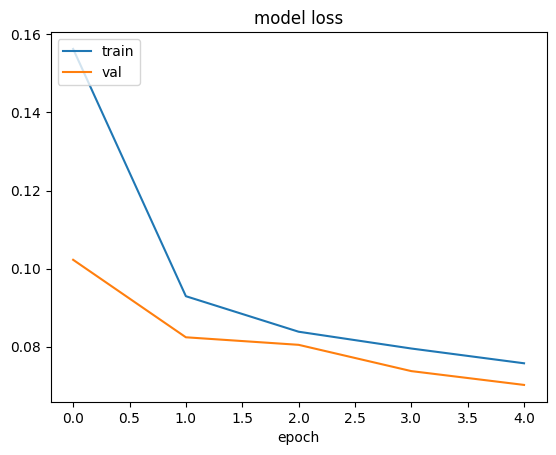

In [ ]:
import keras
import random
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping


random.seed(42)

simpleRNN_model = Sequential([
  SimpleRNN(32, activation='tanh',input_shape=(n_timesteps, n_features), return_sequences=True),
  SimpleRNN(32, activation='tanh', return_sequences = True),
  SimpleRNN(32, activation='tanh'),
  Dense(y_train.shape[1]),
])

simpleRNN_model.summary()

simpleRNN_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0.003,
    restore_best_weights=True
)

smod_history = simpleRNN_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=5,
          batch_size=batch_size,
          shuffle = True
)

preds = simpleRNN_model.predict(X_test_rs)

print(r2_score(preds, y_test))

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/my_modelRNN.keras"
simpleRNN_model.save(model_path)

In [ ]:
preds_denorm = scaler.inverse_transform(preds)
y_test_denorm = scaler.inverse_transform(y_test)

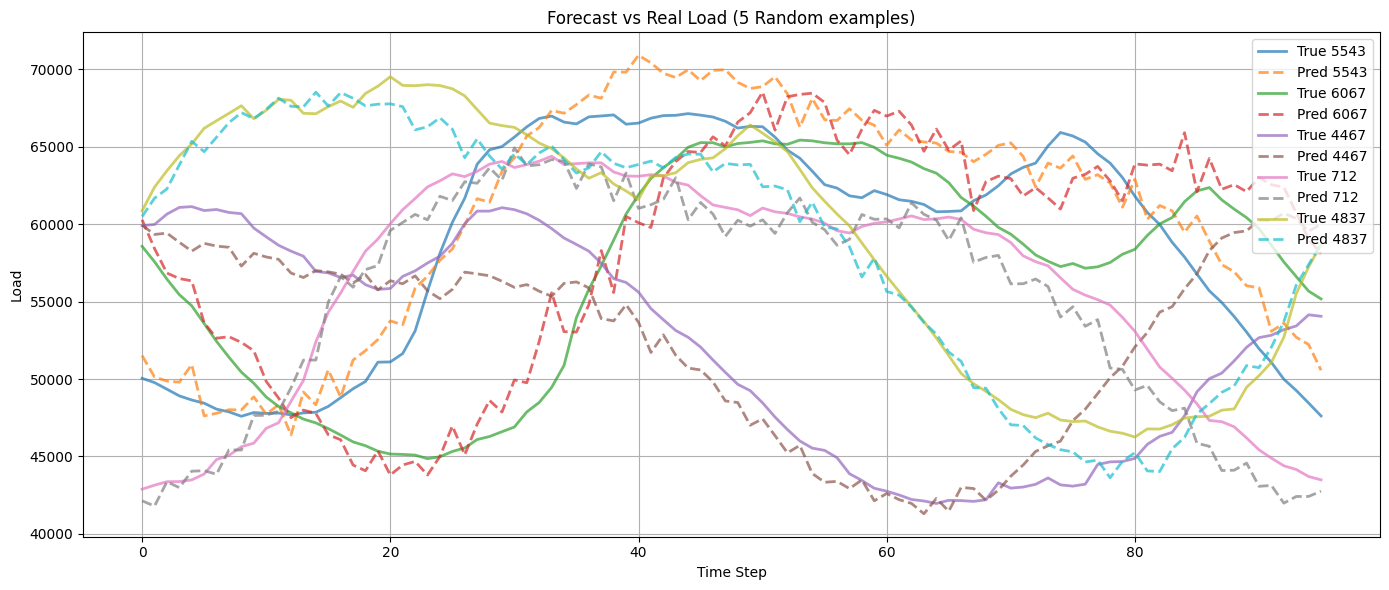

In [ ]:
import random

plt.figure(figsize=(14, 6))
samples = random.sample(range(len(y_test_denorm)), 5)

for i in samples:
    plt.plot(y_test_denorm[i], label=f"True {i}", linewidth=2, alpha=0.7)
    plt.plot(preds_denorm[i], label=f"Pred {i}", linewidth=2, linestyle="--", alpha=0.7)

plt.title("Forecast vs Real Load (5 Random examples)")
plt.xlabel("Time Step")
plt.ylabel("Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
modelRNN = load_model("/content/drive/MyDrive/my_modelRNN.keras")

preds = modelRNN.predict(X_test_rs)

205/205 ━━━━━━━━━━━━━━━━━━━━ 23s 109ms/step


NameError: name 'y_pred' is not defined

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.7639
MAE: 0.0709
RMSE: 0.1018


In [ ]:
import matplotlib.pyplot as plt

# Обратная трансформация
preds_original = scaler.inverse_transform(preds)
y_test_original = scaler.inverse_transform(y_test)

# Визуализация
plt.figure(figsize=(25, 5))
plt.plot(y_test_original.mean(axis=1)[:200], label='Actual mean(72)')
plt.plot(preds_original.mean(axis=1)[:200], label='Predicted mean(72)')
plt.title('RNN Forecast (Mean of 72 Steps)')
plt.xlabel('Time Step')
plt.ylabel('Energy Load (MW)')
plt.legend()
plt.grid(True)
plt.show()

# GRU

In [ ]:
!pip install scikeras --quiet

In [ ]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
df_Load = dfd['Load (incl. self-consumption)']
df_Load.name = "Load"

df_Load_2023 = df_Load.loc["2022-06-01":]
isinstance(df_Load, pd.Series)

True

In [ ]:
df_Load_2023

,Load
Datetime,
2022-06-01 00:00:00,44872.1
2022-06-01 00:15:00,44913.5
2022-06-01 00:30:00,45208.5
2022-06-01 00:45:00,45172.5
2022-06-01 01:00:00,45298.9
...,...
2025-05-04 21:00:00,44676.6
2025-05-04 21:15:00,43930.1
2025-05-04 21:30:00,43159.4


In [ ]:
dfDP = df_Load_2023.copy()
dfDP = dfDP.to_frame()
dfDP.columns

Index(['Load'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDP = pd.DataFrame(scaler.fit_transform(dfDP), columns = ['Load'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


ylist = list(dfDP['Load'])

# Settings:
n_future = 96      # 1 day in future
n_past = 672    # 1 week in past
total_period = n_past + n_future  # total period

# Indexes
idx_end = len(ylist)
idx_start = idx_end - total_period

# Training data
X_new = []
y_new = []
while idx_start > 0:
    x_line = ylist[idx_start:idx_start + n_past]
    y_line = ylist[idx_start + n_past:idx_start + total_period]

    X_new.append(x_line)
    y_new.append(y_line)

    idx_start -= 1  # change by 15 minutes

# Formulating numpy arrays
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
# Checking shapes
print("X_new.shape:", X_new.shape)  # (samples, 216)
print("y_new.shape:", y_new.shape)  # (samples, 72)

X_new.shape: (101754, 672)
y_new.shape: (101754, 96)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

In [ ]:
#Reshape the data to be recognized by keras

batch_size = 64

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 672, 32)        │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 672, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 16)             │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │         1,632 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392 (28.88 KB)

 Trainable params: 7,392 (28.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 646s 753ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566
Epoch 2/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 685s 756ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - val_loss: 0.0542 - val_mean_absolute_error: 0.0542
Epoch 3/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 666s 737ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - val_loss: 0.0484 - val_mean_absolute_error: 0.0484
Epoch 4/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 684s 739ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - val_loss: 0.0446 - val_mean_absolute_error: 0.0446
Epoch 5/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 682s 739ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - val_loss: 0.0384 - val_mean_absolute_error: 0.0384
Epoch 6/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 683s 741ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - val_loss: 0.0376 - val_mean_absolute_error: 0.0376
Epoch 7/10
853/853 ━━━━━━━━━━━━━━━━━━━━ 678s 736ms/step - loss: 0.0520 - mea

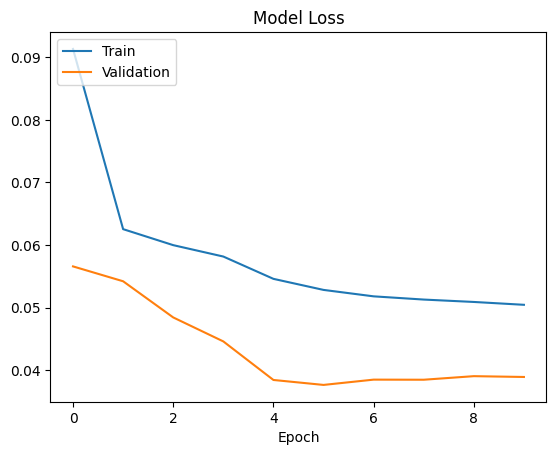

In [ ]:
#A simple architecture with 1 GRU layer

import random
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt





random.seed(42)
from tensorflow.keras.layers import GRU

simple_model = Sequential([
    GRU(32, return_sequences=True, activation='tanh', input_shape=(n_timesteps, n_features)),
    Dropout(0.2),
    GRU(16, activation='tanh'),
    Dropout(0.2),
    Dense(y_train.shape[1])
])


simple_model.summary()

simple_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.01),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0.003,
    restore_best_weights=True
)

smod_history = simple_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=batch_size,
          shuffle = True
          callbacks=[early_stopping],
)

preds = simple_model.predict(X_test_rs)

# Check for NaN values in predictions or test target values
if np.isnan(preds).any() or np.isnan(y_test).any():
    print("Warning: NaN values present in predictions or test target values.")
else:
    r2 = r2_score(y_test, preds)
    print(f"R-squared score: {r2}")

# Plot the training history
plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/my_modelGRU.keras"
simple_model.save(model_path)

In [ ]:
from tensorflow.keras.models import load_model
modelGRU = load_model("/content/drive/MyDrive/my_modelGRU.keras")

predsGRU = modelGRU.predict(X_test_rs)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 136s 129ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, predsGRU)
rmse = np.sqrt(mean_squared_error(y_test, predsGRU))
r2 = r2_score(y_test, predsGRU)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.9269
MAE: 0.0388
RMSE: 0.0510


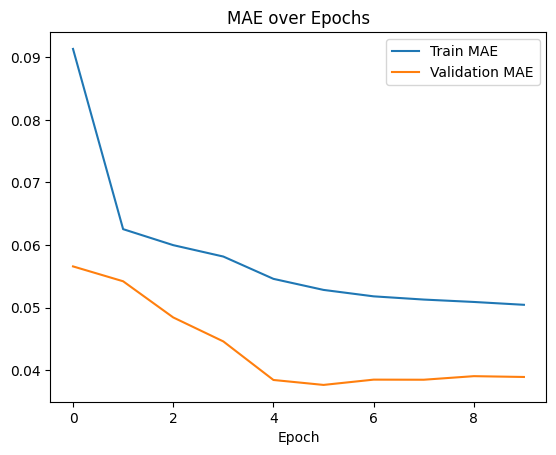

In [ ]:
plt.plot(smod_history.history['mean_absolute_error'])
plt.plot(smod_history.history['val_mean_absolute_error'])
plt.title('MAE over Epochs')
plt.xlabel('Epoch')
plt.legend(['Train MAE', 'Validation MAE'], loc='upper right')
plt.show()

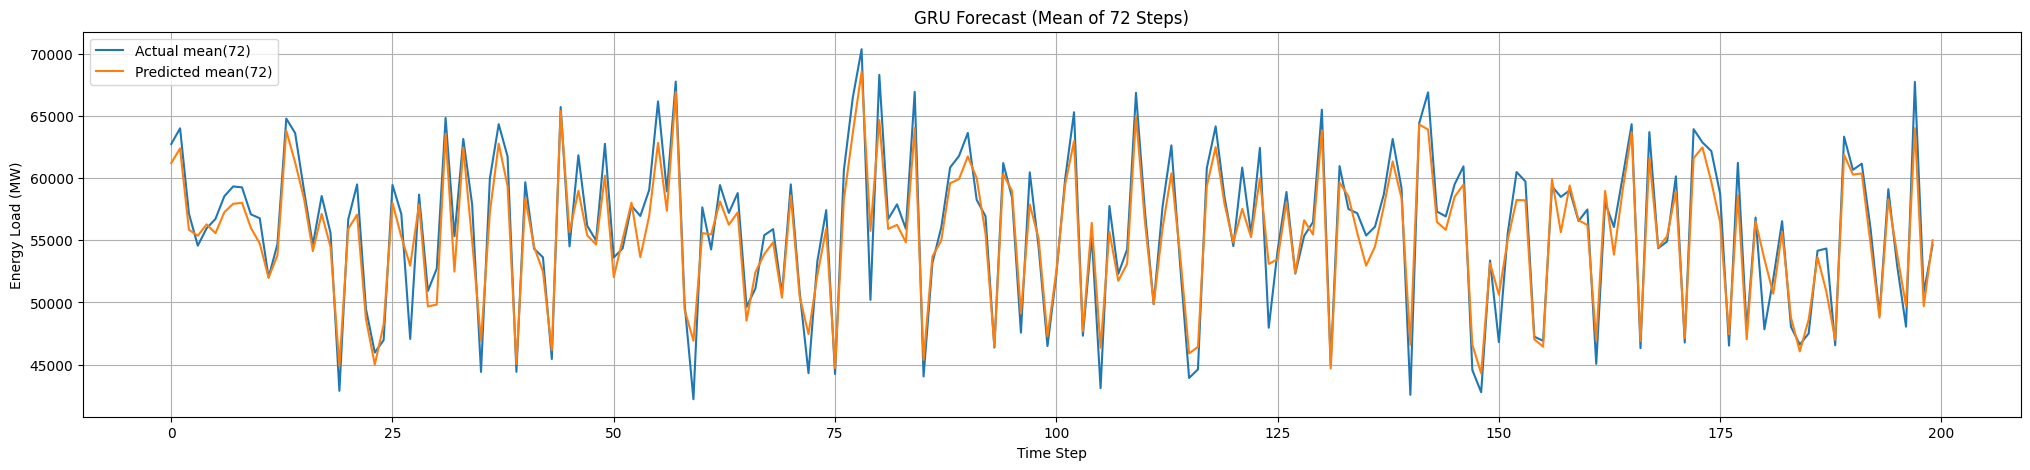

In [ ]:
# Обратная трансформация предсказаний и y_test
preds_original = scaler.inverse_transform(preds)
y_test_original = scaler.inverse_transform(y_test)

plt.figure(figsize=(25, 5))
plt.plot(y_test_original.mean(axis=1)[:200], label='Actual mean(96)')
plt.plot(preds_original.mean(axis=1)[:200], label='Predicted mean(96)')
plt.title('GRU Forecast (Mean of 72 Steps)')
plt.xlabel('Time Step')
plt.ylabel('Energy Load (MW)')
plt.legend()
plt.grid(True)
plt.show()

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np
import random
import tensorflow as tf

In [ ]:
df_Load = dfd['Load (incl. self-consumption)']
df_Load.name = "Load"

df_Load_2023 = df_Load.loc["2022-06-01":]
isinstance(df_Load, pd.Series)

True

In [ ]:
dfDP = df_Load_2023.copy()
dfDP = dfDP.to_frame()
dfDP.columns

Index(['Load'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfDP = pd.DataFrame(scaler.fit_transform(dfDP), columns = ['Load'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


ylist = list(dfDP['Load'])

# Settings:
n_future = 96      # 1 day in future
n_past = 672    # 1 week in past
total_period = n_past + n_future  # total period

# Indexes
idx_end = len(ylist)
idx_start = idx_end - total_period

# Training data
X_new = []
y_new = []
while idx_start > 0:
    x_line = ylist[idx_start:idx_start + n_past]
    y_line = ylist[idx_start + n_past:idx_start + total_period]

    X_new.append(x_line)
    y_new.append(y_line)

    idx_start -= 1  # change by 15 minutes

# Formulating numpy arrays
X_new = np.array(X_new)
y_new = np.array(y_new)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42)

In [ ]:
#Reshape the data to be recognized by keras

batch_size = 64

n_samples = X_train.shape[0]
n_timesteps = X_train.shape[1]
n_steps = y_train.shape[1]
n_features = 1

X_train_rs = X_train.reshape(n_samples, n_timesteps, n_features )

X_test_rs = X_test.reshape(X_test.shape[0], n_timesteps, n_features )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 672, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 672, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │         3,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,840 (61.88 KB)

 Trainable params: 15,840 (61.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 177s 521ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - val_loss: 0.0883 - val_mean_absolute_error: 0.0883
Epoch 2/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 161s 483ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - val_loss: 0.0743 - val_mean_absolute_error: 0.0743
Epoch 3/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 200s 476ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - val_loss: 0.0712 - val_mean_absolute_error: 0.0712
Epoch 4/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 201s 473ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689
Epoch 5/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 201s 469ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - val_loss: 0.0649 - val_mean_absolute_error: 0.0649
Epoch 6/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 204s 476ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - val_loss: 0.0673 - val_mean_absolute_error: 0.0673
Epoch 7/15
333/333 ━━━━━━━━━━━━━━━━━━━━ 203s 480ms/step - loss: 0.0663 - mea

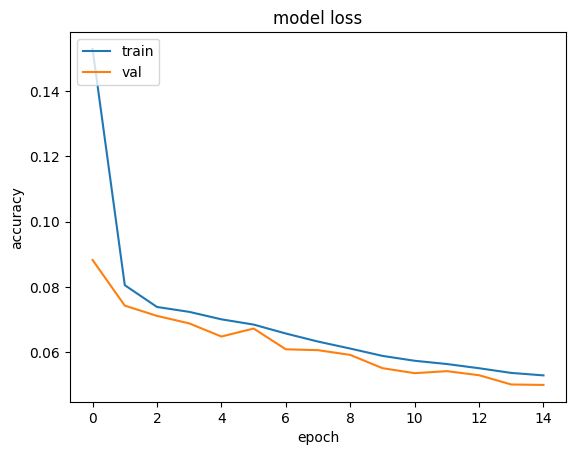

In [ ]:

import random
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


from tensorflow.keras.callbacks import EarlyStopping
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Dropout
random.seed(42)

simpleLSTM_model = Sequential([
    LSTM(32, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dense(y_train.shape[1]),
])

simpleLSTM_model.summary()

simpleLSTM_model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  loss='mean_absolute_error',
  metrics=['mean_absolute_error'],
)



early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0.001,
    restore_best_weights=True
)



smod_history = simpleLSTM_model.fit(X_train_rs, y_train,
          validation_split=0.2,
          epochs=15,
          batch_size=batch_size,
          shuffle = True,
          callbacks=[early_stopping]
)

preds = simpleLSTM_model.predict(X_test_rs)

plt.plot(smod_history.history['loss'])
plt.plot(smod_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model_path = "/content/drive/MyDrive/my_modelLSTM.keras"
simpleLSTM_model.save(model_path)

In [ ]:
from tensorflow.keras.models import load_model
modelLSTM = load_model("/content/drive/MyDrive/my_modelLSTM.keras")

predsLSTM = modelLSTM.predict(X_test_rs)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, predsLSTM)
rmse = np.sqrt(mean_squared_error(y_test, predsLSTM))
r2 = r2_score(y_test, predsLSTM)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R²: 0.7470
MAE: 0.0664
RMSE: 0.0949


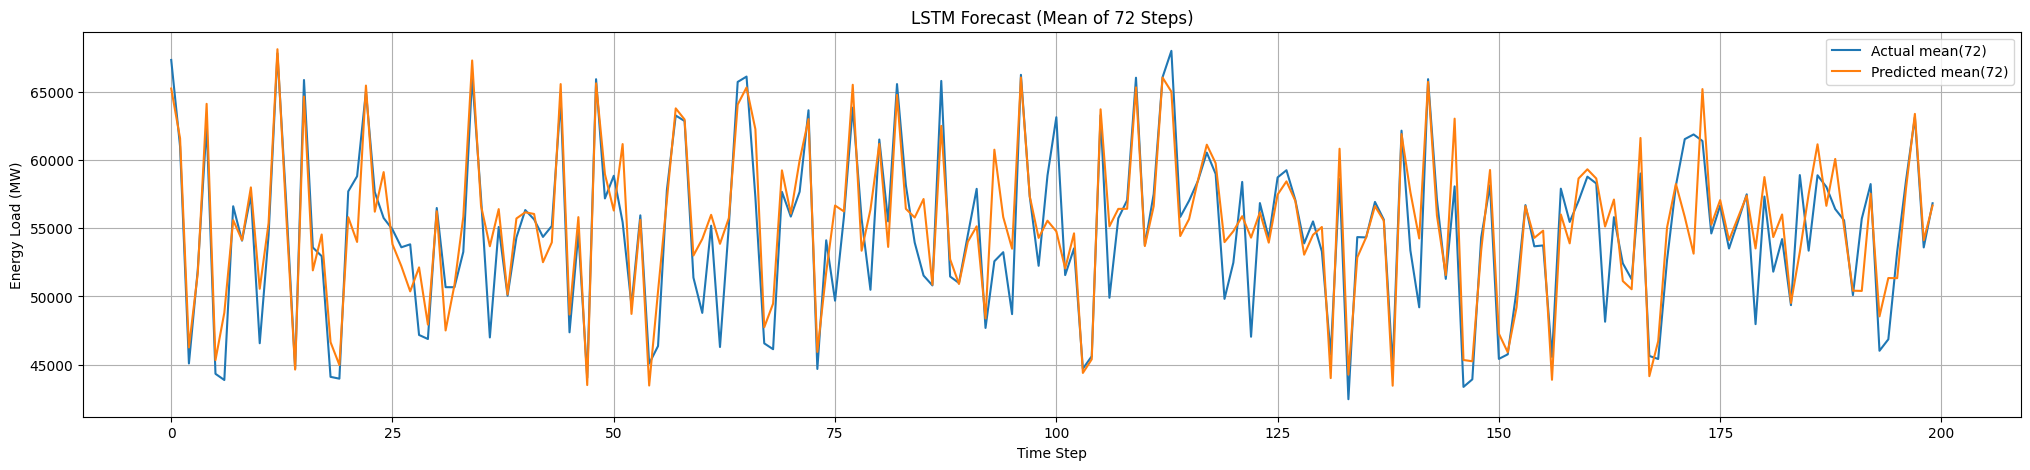

In [ ]:
# Обратная трансформация предсказаний и y_test
preds_original = scaler.inverse_transform(preds)
y_test_original = scaler.inverse_transform(y_test)

plt.figure(figsize=(25, 5))
plt.plot(y_test_original.mean(axis=1)[:200], label='Actual mean(96)')
plt.plot(preds_original.mean(axis=1)[:200], label='Predicted mean(96)')
plt.title('LSTM Forecast (Mean of 96 Steps)')
plt.xlabel('Time Step')
plt.ylabel('Energy Load (MW)')
plt.legend()
plt.grid(True)
plt.show()

added by binayak

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Forecast/final.csv")

In [ ]:
df.head()

,Date,Date (GMT+1),Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Wind offshore,Wind onshore,Solar,Load (incl. self-consumption)
0,2019-12-31 23:00:00,2020-01-01T00:00+01:00,1591.9,5396.8,9410.0,2200.5,503.8,9408.1,27.9,451.2,1026.3,1630.5,1399.9,501.3,5909.1,0.0,47213.4
1,2019-12-31 23:15:00,2020-01-01T00:15+01:00,1586.9,5390.0,9434.5,2159.4,503.9,9209.9,27.9,385.7,628.8,1609.6,1409.5,501.7,5905.6,0.0,46952.8
2,2019-12-31 23:30:00,2020-01-01T00:30+01:00,1581.2,5372.1,9467.0,2153.1,503.9,9069.3,27.9,274.5,528.6,1609.2,1416.4,540.7,6108.3,0.0,46620.7
3,2019-12-31 23:45:00,2020-01-01T00:45+01:00,1581.3,5372.3,9479.7,2186.7,503.9,8956.1,27.8,98.7,312.0,1609.5,1408.1,655.5,6240.5,0.0,46425.5
4,2020-01-01 00:00:00,2020-01-01T01:00+01:00,1581.8,5369.3,9540.4,2145.8,503.9,8659.5,27.9,244.1,723.0,1609.3,1385.0,890.6,6094.6,0.0,46283.2


In [ ]:

df.drop(columns=["Date"], inplace=True)

In [ ]:
df.head()

,Date (GMT+1),Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Wind offshore,Wind onshore,Solar,Load (incl. self-consumption)
0,2020-01-01T00:00+01:00,1591.9,5396.8,9410.0,2200.5,503.8,9408.1,27.9,451.2,1026.3,1630.5,1399.9,501.3,5909.1,0.0,47213.4
1,2020-01-01T00:15+01:00,1586.9,5390.0,9434.5,2159.4,503.9,9209.9,27.9,385.7,628.8,1609.6,1409.5,501.7,5905.6,0.0,46952.8
2,2020-01-01T00:30+01:00,1581.2,5372.1,9467.0,2153.1,503.9,9069.3,27.9,274.5,528.6,1609.2,1416.4,540.7,6108.3,0.0,46620.7
3,2020-01-01T00:45+01:00,1581.3,5372.3,9479.7,2186.7,503.9,8956.1,27.8,98.7,312.0,1609.5,1408.1,655.5,6240.5,0.0,46425.5
4,2020-01-01T01:00+01:00,1581.8,5369.3,9540.4,2145.8,503.9,8659.5,27.9,244.1,723.0,1609.3,1385.0,890.6,6094.6,0.0,46283.2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Select all columns except the date columns
features = [col for col in df.columns if col not in ['Date (GMT+1)','Load (incl. self-consumption)' ]]

# Select features and target

target = 'Load (incl. self-consumption)'  # target variable

data = df[features + [target]]

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Parameters
n_past = 672   # past 1 week (assuming 15-min interval)
n_future = 96  # predict next day




In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_past, len(features)), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(n_future))

model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        46,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │         9,696 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,696 (217.56 KB)

 Trainable params: 55,696 (217.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, n_past, n_future, features, batch_size=32):
        self.data = data
        self.n_past = n_past
        self.n_future = n_future
        self.features = features
        self.batch_size = batch_size
        self.indices = np.arange(n_past, len(data) - n_future + 1)

    def __len__(self):
        return int(np.floor(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        X_batch = []
        y_batch = []
        for i in batch_indices:
            X_batch.append(self.data[i - self.n_past:i, :-1])
            y_batch.append(self.data[i:i + self.n_future, -1])
        return np.array(X_batch), np.array(y_batch)

# Create generator instance
train_gen = DataGenerator(scaled_data, n_past, n_future, features, batch_size=32)

# Then train with generator:
model.fit(train_gen, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5828/5828 ━━━━━━━━━━━━━━━━━━━━ 2756s 472ms/step - loss: nan
Epoch 2/5
5828/5828 ━━━━━━━━━━━━━━━━━━━━ 2714s 466ms/step - loss: nan
Epoch 3/5
5828/5828 ━━━━━━━━━━━━━━━━━━━━ 2708s 465ms/step - loss: nan
Epoch 4/5
5692/5828 ━━━━━━━━━━━━━━━━━━━━ 1:02 461ms/step - loss: nan